In [33]:
# Gabriel Chang

# funcion para descargar paquetes al ejecutar el scrip, sin necesidad de hacerlo por la terminal

import os
import subprocess
import sys

# en ese arreglo incluyo los paquetes que debo instalar, para facilitar el mantenimiento
required_packages = ['gdown', 'pandas', 'matplotlib', 'wordcloud', 'nltk', 'plotly']

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [34]:
for package in required_packages:
    try:
        __import__(package)
        print(f"'{package}' ya está instalado.")
    except ImportError:
        print(f"'{package}' no está instalado. Instalando...")
        install(package)

'gdown' ya está instalado.
'pandas' ya está instalado.
'matplotlib' ya está instalado.
'wordcloud' ya está instalado.
'nltk' ya está instalado.
'plotly' ya está instalado.


In [41]:
# Import de librerias y otros recursos

import os
import gdown
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import plotly.express as px
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Yamila Karim
[nltk_data]     Conrado\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# ESTE SEGMENTO DE CODIGO ES PARA BUSCAR EL DATA SET EN DICHO ENLACE Y DESCRGARLO
# PRIMERO LO BUSCO SI, EN EL PROYECTO PARA VER SI YA ESTÁ

url = 'https://drive.google.com/uc?id=1nONpng5xOXNr2kK-bdtLL4RsaingezVK'
dataset = 'Reviews.csv'

if os.path.exists(dataset):
    print(f'El archivo "{dataset}" ya existe en la carpeta.')
else:
    print(f'Descargando el archivo "{dataset}"...')
    gdown.download(url, dataset, quiet=False)

# Intentar cargar el DataFrame
try:
    df = pd.read_csv(dataset)
    print('ARCHIVO CSV CARGADO EXITOSAMENTE')
    print('\nIMPRIMIENDO HEAD DEL DATASET:\n', df.head())
except Exception as ex:
    print('ERROR AL CARGAR EL DATAFRAME --> ', ex)

El archivo "Reviews.csv" ya existe en la carpeta.
ARCHIVO CSV CARGADO EXITOSAMENTE

IMPRIMIENDO HEAD DEL DATASET:
    Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                   

In [37]:
# Cantidad de registros:
print('CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET --> ', df.shape[0])

# Cantidad de columnas:
print('\nCANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET --> ', df.shape[1])

# Descripcion de los datos
print(f'\nIMPRRIMIENDO NÚMERO DE FILAS Y TIPOS DE DATOS:\n')
print(df.info())

# Estadísticas básicas
print(f'\nIMPRMIENDO ESTADÍSTICAS BÁSICAS DEL DATA FRAME:')
print(df.describe().T)

CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET -->  568454

CANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET -->  10

IMPRRIMIENDO NÚMERO DE FILAS Y TIPOS DE DATOS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None

IMPRMIENDO ESTADÍSTICAS BÁSICAS D

In [38]:
# aqui busco la frecuencia de las valores de la columna "score" para el grafico que voy a pintar
freq_valores_score = df['Score'].value_counts().sort_index()

figure = px.bar(freq_valores_score,
                x=freq_valores_score.index, 
                y=freq_valores_score.values, 
                labels={
                        'x': 'Score',
                        'y': 'Count'
                    },
                title='Distribución de Valores - Score de Productos')


figure.show()

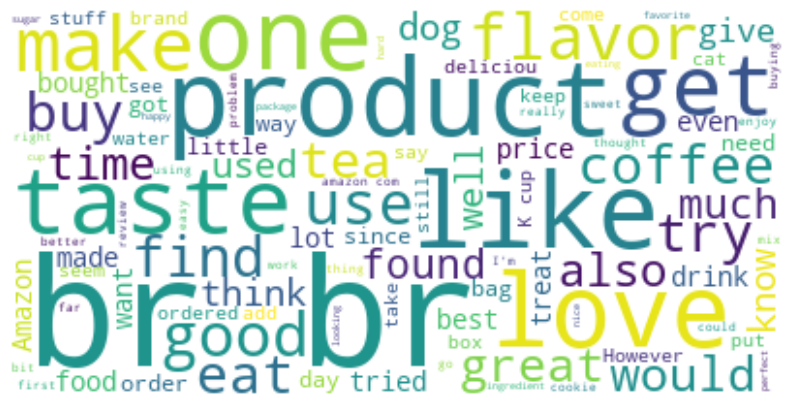

In [50]:
# por el momento, estuve tanteando con samples de la cantidad total, mas que todo para que ejecutara mas rapido
df_sample = df.sample(n=300000, random_state=42)

# botamos los registros que tengan nulo en esta columna, o solo sean espacios en blanco
df_sample = df_sample.dropna(subset=['Text'])
df_sample = df_sample[df_sample['Text'].str.strip() != '']

# definir las stop words, y crear la nube de palabras a partir de la columna 'Text'
text = " ".join(review for review in df_sample['Text'].astype(str))
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=100, contour_color='steelblue').generate(text)

# pintar y display la word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
# Paso 3 - Clasificando los tweets

# primero, voy a borrar los valores nulos según instrucciones (Score = 3)
df = df[df['Score'] != 3]

# creamos una columna nueva en el data frame, y utlizamos una lambda sencilla para 
# 'Sentiment', en donde para cada valor de 'Score', validamos si es < 3 o > 3 
# # para asignar 1 y -1
df['sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else -1)

print('Ejemplo de algunos valores de la columna nueva Sentiment:')
print(f'\n{df[['Score', 'sentiment']].sample(20)}')
 

Ejemplo de algunos valores de la columna nueva Sentiment:

        Score  sentiment
1297        5          1
210327      1         -1
274477      4          1
105098      5          1
130189      5          1
530571      5          1
131800      5          1
481920      5          1
291483      5          1
89725       4          1
516458      5          1
47810       5          1
301600      5          1
561470      5          1
251075      1         -1
494268      5          1
68365       5          1
441714      5          1
531803      5          1
561728      1         -1
